In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


,date,value
0,2016-05-09,0
1,2016-05-10,0
2,2016-05-11,2398
3,2016-05-12,4144
4,2016-05-13,11353


In [3]:
df.set_index('date')

,value
date,
2016-05-09,0
2016-05-10,0
2016-05-11,2398
2016-05-12,4144
2016-05-13,11353
...,...
2019-11-29,62140
2019-11-30,62844
2019-12-01,58153


In [5]:
df = df[
    (df["value"] >= df["value"].quantile(0.025)) & 
    (df["value"] <= df["value"].quantile(0.975))]

In [18]:
df.index = pd.to_datetime(df.index)

In [6]:
def draw_line_plot():
    # Create a copy of the dataframe for the plot
    df_line = df.copy()

    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_line.index, df_line['value'], color='red', linewidth=1)

    # Set Title and Labels
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    fig.savefig('line_plot.png')
    return fig

In [23]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    
    if not isinstance(df_bar.index, pd.DatetimeIndex):
        df_bar.index = pd.to_datetime(df_bar.index)

    # Extract year and month for grouping
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Group by year and month, calculating the mean
    df_bar_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Define the order of months
    months_order = [
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December"
    ]
    
    # SAFETY FIX 2: Use reindex to handle missing months gracefully
    df_bar_grouped = df_bar_grouped.reindex(columns=months_order)

    # Draw bar plot
    fig = df_bar_grouped.plot(kind='bar', figsize=(15, 10)).figure
    
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months", loc='upper left')

    # Save image and return fig
    fig.savefig('bar_plot.png')
    return fig

In [31]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    
    
    df_box['date'] = pd.to_datetime(df_box['date'])
    

    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # 1. Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
    
    # 2. Month-wise Box Plot (Seasonality)
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")

    # Save image and return fig
    fig.savefig('box_plot.png')
    return fig

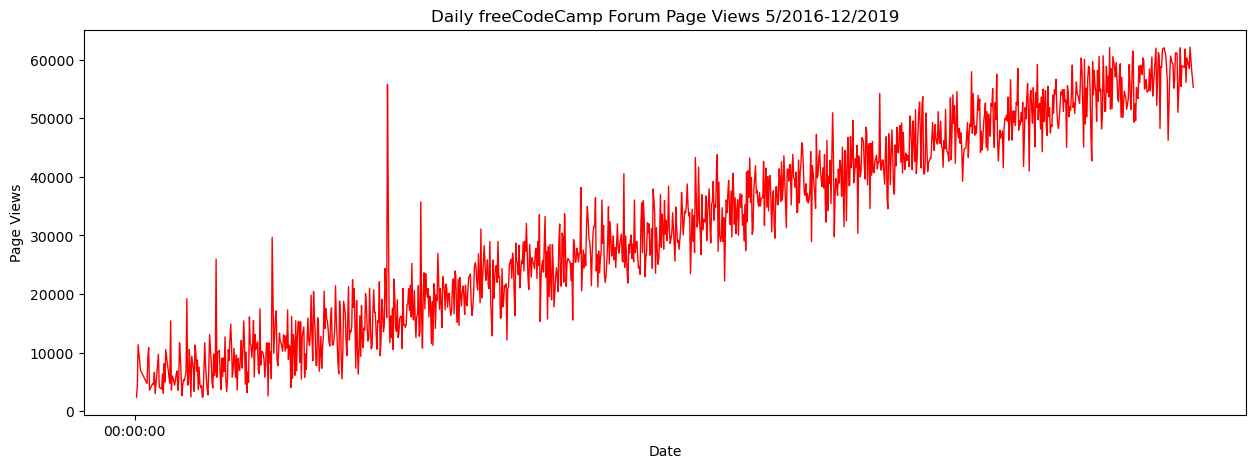

In [32]:
draw_line_plot()

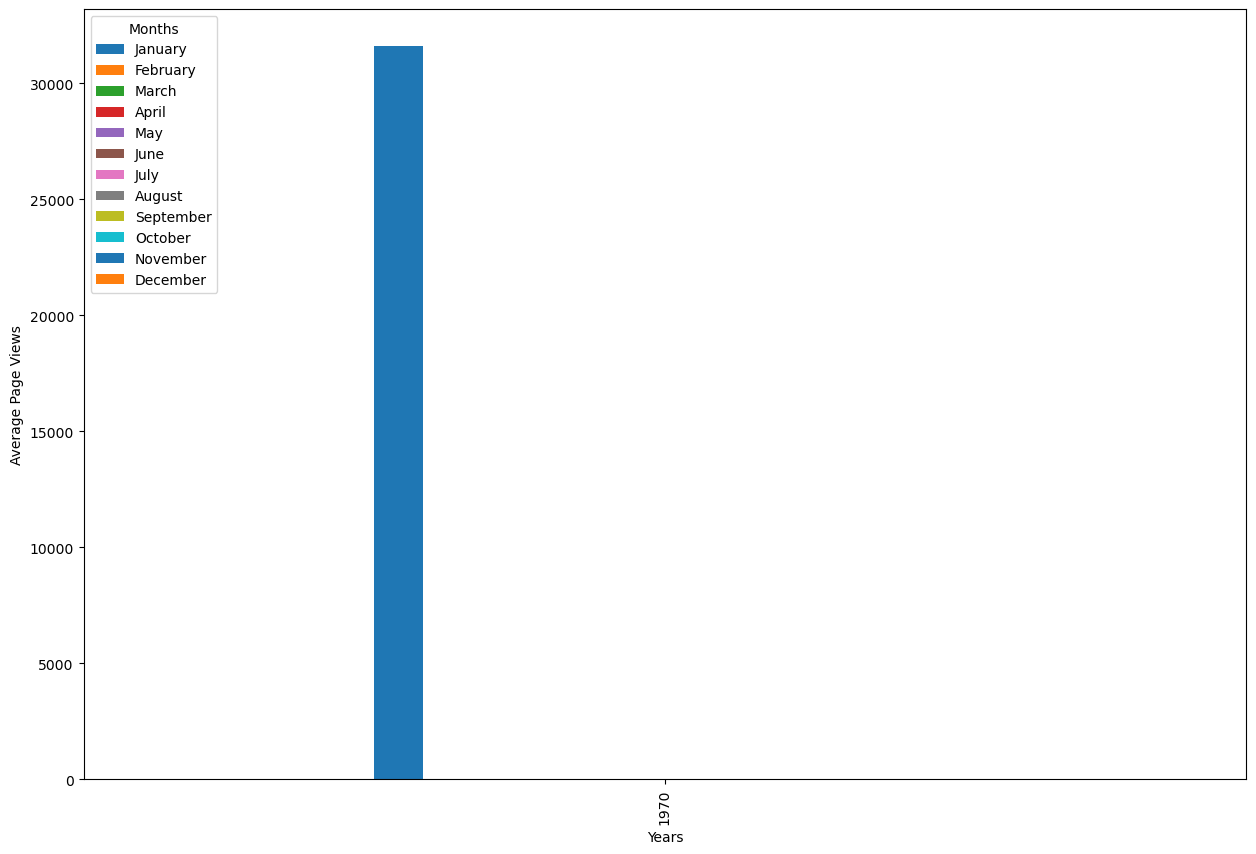

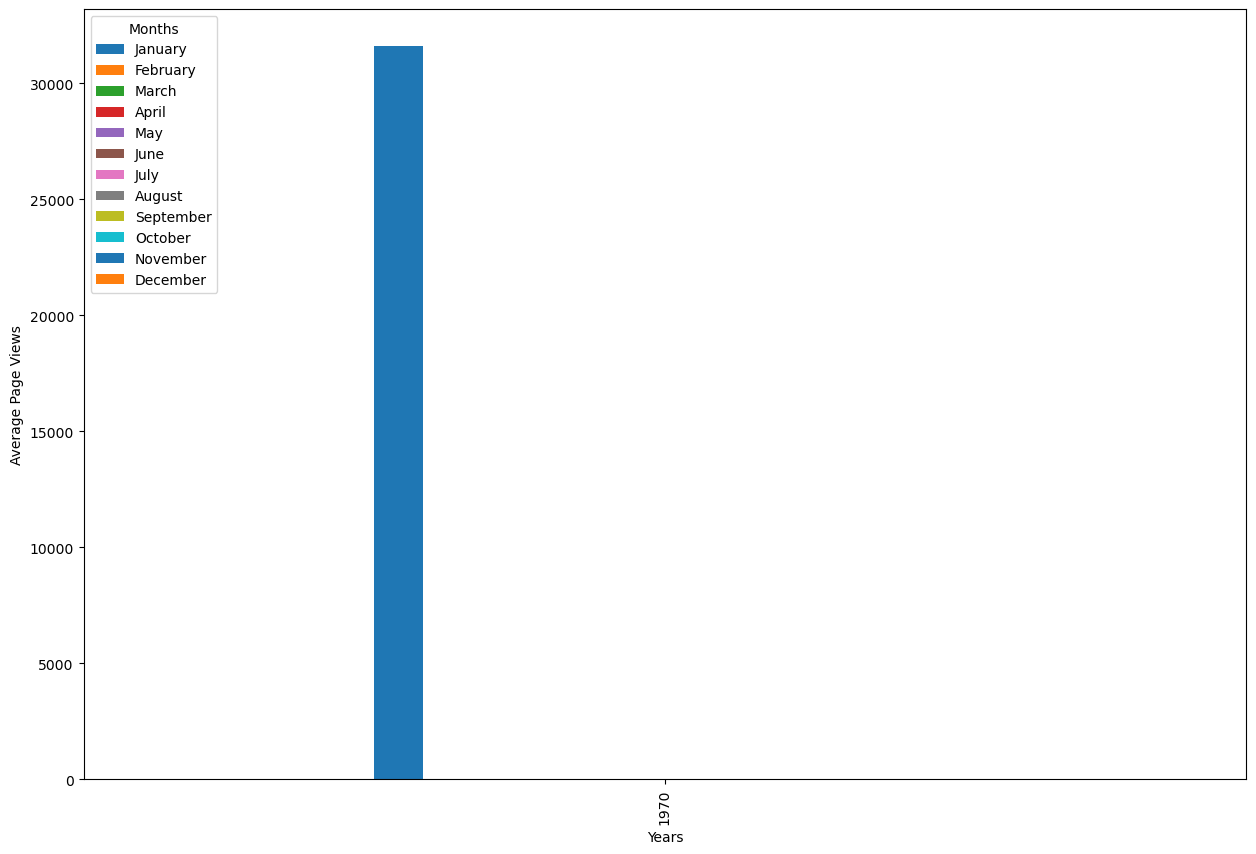

In [33]:
draw_bar_plot()

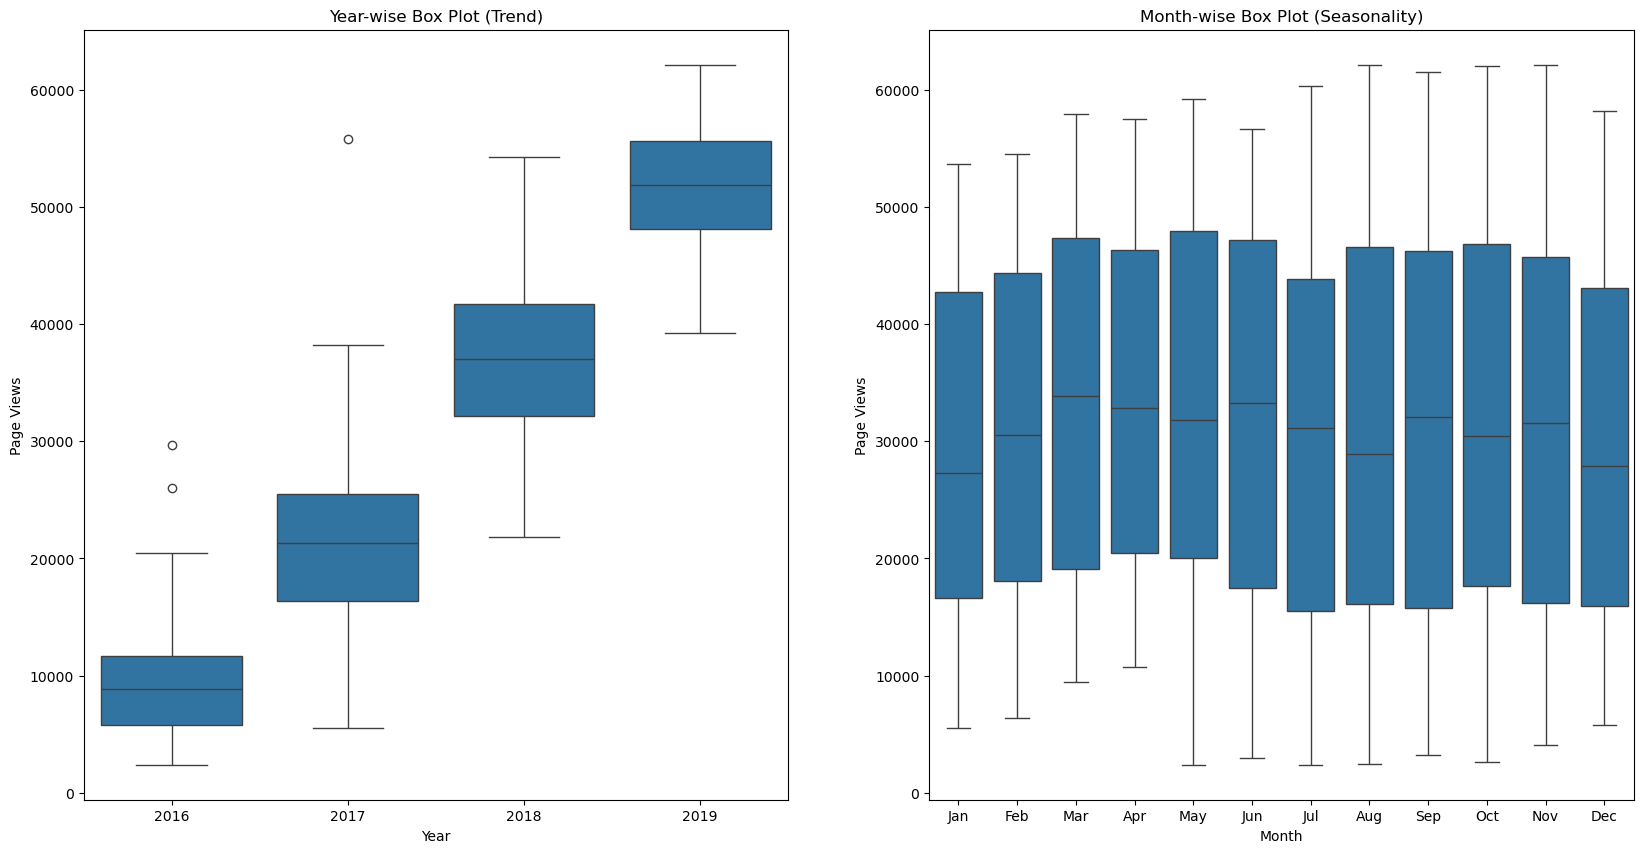

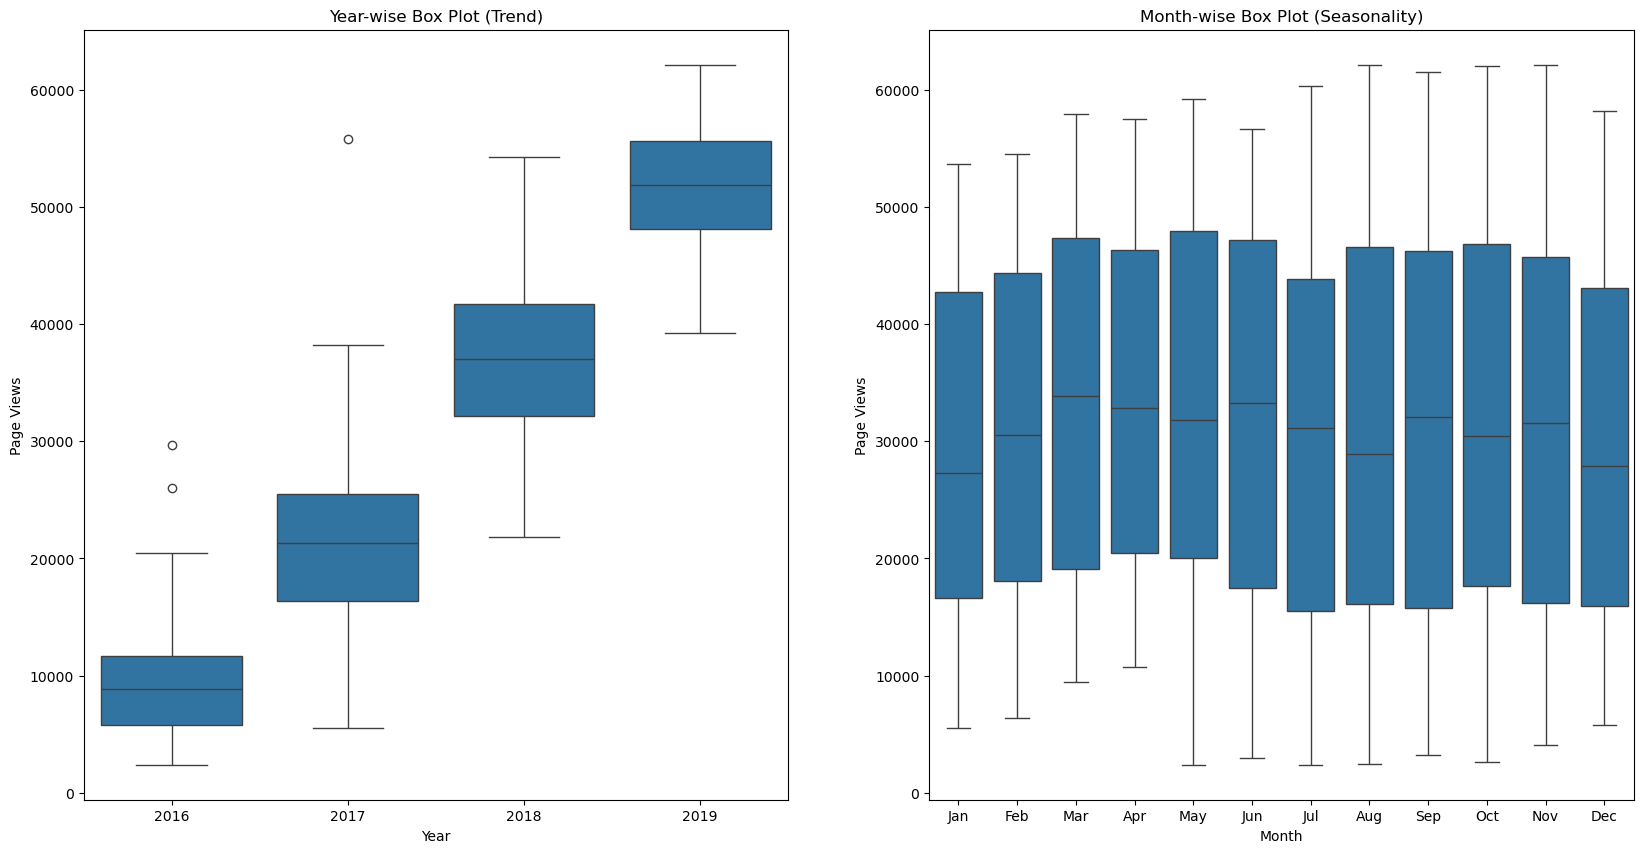

In [34]:
draw_box_plot()